In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
import torch
from tqdm.notebook import tqdm
import pickle
%matplotlib inline

In [ ]:
from google.colab import files
uploades = files.upload()

Saving dataset_komentar_instagram_cyberbullying.csv to dataset_komentar_instagram_cyberbullying.csv


In [ ]:
df = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
df

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [ ]:
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


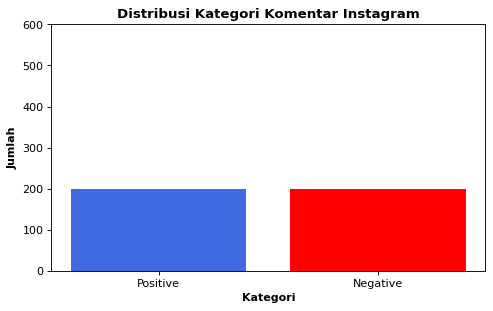

In [ ]:
height = df['Sentiment'].value_counts()
sentiment = ('Positive', 'Negative')
y_pos = np.arange(len(sentiment))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori Komentar Instagram', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['royalblue', 'red' ])
plt.xticks(y_pos, sentiment)
plt.show()

In [ ]:
import re

def casefolding(text):
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'[-+]?[0-9]', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.strip()
  return text

In [ ]:
raw_sample = df['Instagram Comment Text'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data     : ', raw_sample)
print('Case folding : ', case_folding)

Raw data     :  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding :  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
more_stopword = ['username']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = df['Instagram Comment Text'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data         : ', raw_sample)
print('Case folding     : ', case_folding)
print('Stopword removal : ', stopword_removal)

Raw data         :  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding     :  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya
Stopword removal :  pantesan tinggalin laki ya lakinya mikir kali perempuannya kayagni ngurus aja gak becus gimana ngurus anak mending anak bapake nya aja bener didiknya


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = df['Instagram Comment Text'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data         : ', raw_sample)
print('Case folding     : ', case_folding)
print('Stopword removal : ', stopword_removal)
print('Stemming         : ',text_stemming)

Raw data         :  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding     :  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya
Stopword removal :  pantesan tinggalin laki ya lakinya mikir kali perempuannya kayagni ngurus aja gak becus gimana ngurus anak mending anak bapake nya aja bener didiknya
Stemming         :  pantesan tinggalin laki ya laki mikir kali perempuan kayagni ngurus aja gak becus gimana ngurus anak mending anak bapake nya aja bener didik


In [ ]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = stemming(text)
  text = remove_stop_words(text)
  return text

In [ ]:
%%time
df['clean_teks'] = df['Instagram Comment Text'].apply(text_preprocessing_process)

CPU times: user 3min 42s, sys: 582 ms, total: 3min 42s
Wall time: 4min 7s


In [ ]:
df

,Id,Sentiment,Instagram Comment Text,clean_teks
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak hubung nya gugur dgn pake hijab syar...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt bain balikanhadewwntar ...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn mewek skr lengket lg duhhh labil bgt sih ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kesel att nya gausah anak kasi kembang ps...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp yg jd peran...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga suami yg istri profesi kau juara sehat ...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja yg halal u tuk nafkah keluarga se...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran gak kerja trus put...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,asli cantik ayu loh mbak krn temu langsung sem...


In [ ]:
df.to_csv('clean_data.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(df['clean_teks']).toarray()
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nbModel = GaussianNB()
nbModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

y_pred = nbModel.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score : \n", f1_score(y_test, y_pred, average="macro"))
print("Precision Score : \n", precision_score(y_test, y_pred, average="macro"))
print("Recall Score : \n", recall_score(y_test, y_pred, average="macro"))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.78      0.83        46
    positive       0.74      0.85      0.79        34

    accuracy                           0.81        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80

F1 Score : 
 0.8110533774208786
Precision Score : 
 0.8108192620387742
Recall Score : 
 0.8177749360613811
Accuracy Score : 
 0.8125


In [ ]:
new_string = "bagus banget" 
s = [new_string]
new_X_test = tf_idf.transform(s).toarray()
pred = nbModel.predict(new_X_test)
print(f"kalimat ({new_string}), bermuatan {pred[0]}")

kalimat (bagus banget), bermuatan positive
